In [35]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [36]:

# Load the dataset
file_path = 'Subdivisions_home_values.csv'
data = pd.read_csv(file_path)

# Splitting the 'Subdivision' column into 'Subdivision Name', 'County', and 'State'
data[['Subdivision Name', 'County', 'State']] = data['Subdivision'].str.extract(
    r'^(.*?),\s*(.*? County),\s*(.*?)$'
)

# Dropping redundant columns
columns_to_drop = ['state', 'county', 'county subdivision', 'Subdivision']
cleaned_data = data.drop(columns=columns_to_drop)

# Renaming columns for better readability
cleaned_data = cleaned_data.rename(
    columns={
        'Median Home Value': 'Median_Home_Value',
        'Year': 'Year_of_Data'})

# Rearranging columns for better organization
cleaned_data = cleaned_data[['Subdivision Name', 'County', 'Year_of_Data', 'Median_Home_Value']]

# Resetting the index
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data




,Subdivision Name,County,Year_of_Data,Median_Home_Value
0,Gresham CCD,Multnomah County,2019,294300
1,Portland East CCD,Multnomah County,2019,383900
2,Portland West CCD,Multnomah County,2019,557100
3,Corbett CCD,Multnomah County,2019,422500
4,Skyline CCD,Multnomah County,2019,592000
...,...,...,...,...
110,Chehalem Mountains CCD,Washington County,2023,645300
111,Coast Range CCD,Washington County,2023,550200
112,Forest Grove-Cornelius CCD,Washington County,2023,457200
113,North Plains CCD,Washington County,2023,645200


In [37]:
# Calculate the number of unique subdivisions
unique_subdivisions = cleaned_data['Subdivision Name'].nunique()
print(f"Number of unique subdivisions: {unique_subdivisions}")

# Get the list of unique subdivisions
unique_subdivision_list = cleaned_data['Subdivision Name'].unique()
unique_subdivision_list


Number of unique subdivisions: 23


array(['Gresham CCD', 'Portland East CCD', 'Portland West CCD',
       'Corbett CCD', 'Skyline CCD', 'Beavercreek CCD', 'Wilsonville CCD',
       'Yoder CCD', 'Estacada CCD', 'Redland CCD',
       'Northwest Clackamas CCD', 'Canby CCD', 'Molalla CCD',
       'Mount Hood CCD', 'Colton CCD', 'Sandy CCD', 'Mulino CCD',
       'Beaverton-Hillsboro CCD', 'North Plains CCD',
       'Forest Grove-Cornelius CCD', 'Chehalem Mountains CCD',
       'Rockcreek CCD', 'Coast Range CCD'], dtype=object)

In [38]:
# Pivoting the DataFrame to organize years as columns and explicitly creating a new DataFrame
pivoted_data = pd.DataFrame(
    cleaned_data.pivot_table(
        index='Subdivision Name',  # Correct column name
        columns='Year_of_Data',
        values='Median_Home_Value'
    ).reset_index()
)

# Display the pivoted DataFrame
pivoted_data


Year_of_Data,Subdivision Name,2019,2020,2021,2022,2023
0,Beavercreek CCD,468400.0,501200.0,522900.0,644600.0,660600.0
1,Beaverton-Hillsboro CCD,384400.0,410900.0,436300.0,501200.0,556000.0
2,Canby CCD,334100.0,365500.0,390600.0,455000.0,484700.0
3,Chehalem Mountains CCD,478000.0,495800.0,549600.0,660500.0,645300.0
4,Coast Range CCD,433800.0,453800.0,455700.0,507000.0,550200.0
5,Colton CCD,347400.0,391500.0,440700.0,493300.0,555400.0
6,Corbett CCD,422500.0,461700.0,496400.0,609400.0,654100.0
7,Estacada CCD,368800.0,392700.0,431200.0,511800.0,572400.0
8,Forest Grove-Cornelius CCD,304400.0,339100.0,366600.0,429100.0,457200.0
9,Gresham CCD,294300.0,324300.0,348600.0,410900.0,438300.0


In [39]:
# Pivoting the DataFrame to organize years as columns
pivoted_data = cleaned_data.pivot_table(
    index='Subdivision Name',  # Correct column name
    columns='Year_of_Data',
    values='Median_Home_Value'
).reset_index()

# Display the pivoted DataFrame
pivoted_data


Year_of_Data,Subdivision Name,2019,2020,2021,2022,2023
0,Beavercreek CCD,468400.0,501200.0,522900.0,644600.0,660600.0
1,Beaverton-Hillsboro CCD,384400.0,410900.0,436300.0,501200.0,556000.0
2,Canby CCD,334100.0,365500.0,390600.0,455000.0,484700.0
3,Chehalem Mountains CCD,478000.0,495800.0,549600.0,660500.0,645300.0
4,Coast Range CCD,433800.0,453800.0,455700.0,507000.0,550200.0
5,Colton CCD,347400.0,391500.0,440700.0,493300.0,555400.0
6,Corbett CCD,422500.0,461700.0,496400.0,609400.0,654100.0
7,Estacada CCD,368800.0,392700.0,431200.0,511800.0,572400.0
8,Forest Grove-Cornelius CCD,304400.0,339100.0,366600.0,429100.0,457200.0
9,Gresham CCD,294300.0,324300.0,348600.0,410900.0,438300.0


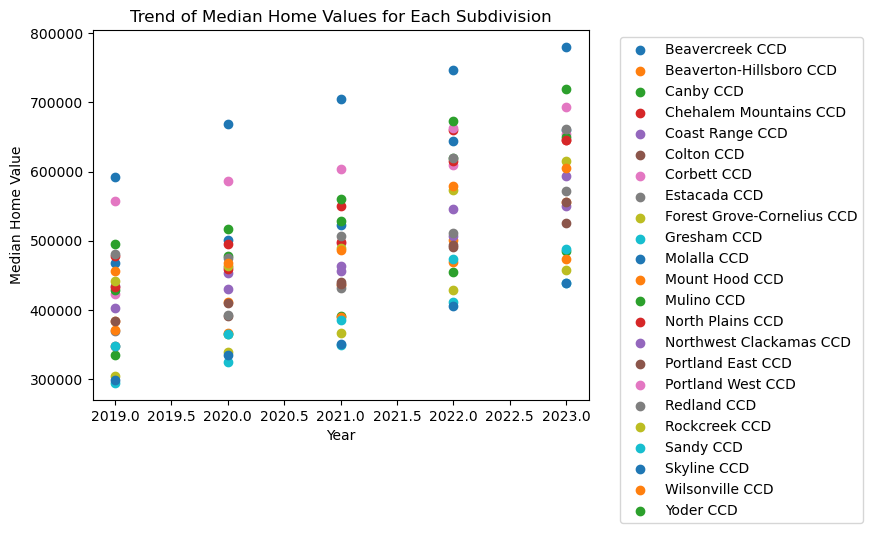

In [40]:

# Assume 'data' is your original DataFrame
# Dropping redundant columns
columns_to_drop = ['state', 'county', 'county subdivision', 'Subdivision']
cleaned_data = data.drop(columns=columns_to_drop)

# Renaming columns for better readability
cleaned_data = cleaned_data.rename(
    columns={
        'Median Home Value': 'Median_Home_Value',
        'Year': 'Year_of_Data',
        'Subdivision Name': 'Subdivision-Name',
        'County': 'county'
    }
)

# Rearranging the columns
desired_column_order = ['Subdivision-Name', 'county', 'Median_Home_Value', 'Year_of_Data']
cleaned_data = cleaned_data[desired_column_order]

# Pivoting the DataFrame
pivoted_data = cleaned_data.pivot_table(index='Subdivision-Name', columns='Year_of_Data', values='Median_Home_Value')

# Plotting the trend for each subdivision using scatter plots
for subdivision in pivoted_data.index:
    plt.scatter(pivoted_data.columns, pivoted_data.loc[subdivision, :], label=subdivision)
plt.xlabel('Year')
plt.ylabel('Median Home Value')
plt.title('Trend of Median Home Values for Each Subdivision')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Color Mapping in the Heatmap
* Lighter Colors (Yellow to Light Green): Lower median home values = More affordable.

* Medium Colors (Green): Moderate median home values.

* Darker Colors (Blue to Dark Blue): Higher median home values = Less affordable.


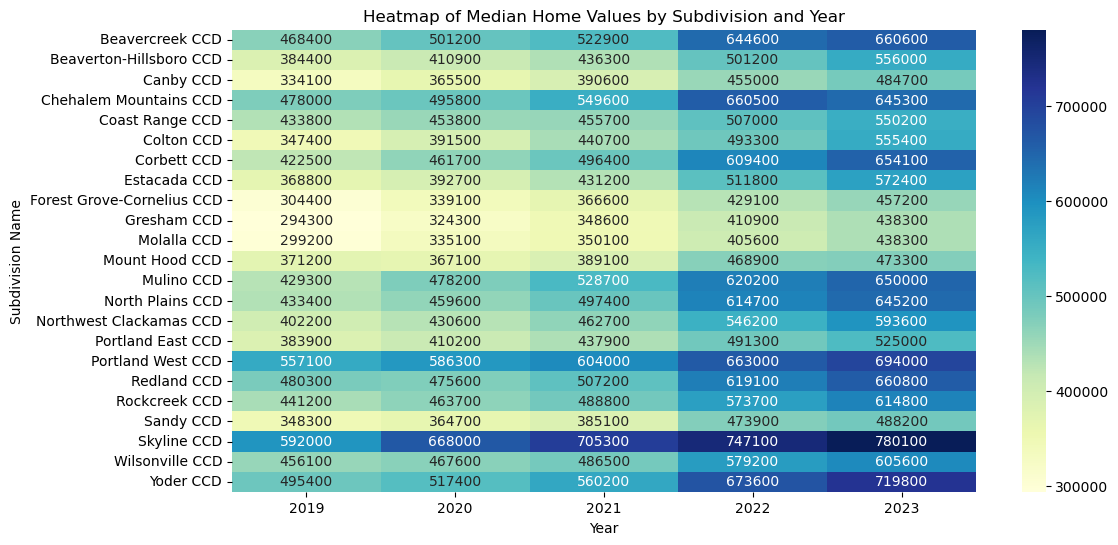

In [41]:

# Assume 'data' is your original DataFrame
# Dropping redundant columns
columns_to_drop = ['state', 'county', 'county subdivision', 'Subdivision']
cleaned_data = data.drop(columns=columns_to_drop)

# Renaming columns for better readability
cleaned_data = cleaned_data.rename(
    columns={
        'Median Home Value': 'Median_Home_Value',
        'Year': 'Year_of_Data',
        'Subdivision Name': 'Subdivision-Name',
        'County': 'county' })

# Rearranging the columns
desired_column_order = ['Subdivision-Name', 'county', 'Median_Home_Value', 'Year_of_Data']
cleaned_data = cleaned_data[desired_column_order]

# Pivoting the DataFrame
pivoted_data = cleaned_data.pivot_table(index='Subdivision-Name', columns='Year_of_Data', values='Median_Home_Value')

# Generating the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivoted_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel('Year')
plt.ylabel('Subdivision Name')
plt.title('Heatmap of Median Home Values by Subdivision and Year')
plt.show()


In [42]:

# Load the cleaned data
file_path = "Cleaned_Subdivisions_Data.csv"  
df_cleaned = pd.read_csv(file_path)

# Filter for the latest available year
latest_year = df_cleaned["Year"].max()
df_latest = df_cleaned[df_cleaned["Year"] == latest_year].dropna(subset=["Latitude", "Longitude"])

# Create an interactive scatter map
fig = px.scatter_mapbox(
    df_latest,
    lat='Latitude',
    lon='Longitude',
    size="Median Home Value",
    color="Median Home Value",
    hover_name="Subdivision",
    hover_data=["County", "Median Home Value", "Year"],
    mapbox_style="carto-positron",
    color_continuous_scale="viridis",
    title=f"Median Home Values by Subdivision ({latest_year})"
)

# Increase figure size
fig.update_layout(
    autosize=True,
    width=1200,
    height=800
)

# Display the map
fig.show()


In [43]:
import pandas as pd
import plotly.express as px

# Load the cleaned data
file_path = "Cleaned_Subdivisions_Data.csv"  
df_cleaned = pd.read_csv(file_path)

# Filter for the latest available year
latest_year = df_cleaned["Year"].max()
df_latest = df_cleaned[df_cleaned["Year"] == latest_year].dropna(subset=["Latitude", "Longitude"])

# Create an interactive scatter map with custom color scale
fig = px.scatter_mapbox(
    df_latest,
    lat='Latitude',
    lon='Longitude',
    size="Median Home Value",
    color="Median Home Value",
    hover_name="Subdivision",
    hover_data=["County", "Median Home Value", "Year"],
    mapbox_style="carto-positron",
    color_continuous_scale=["green", "yellow", "red"],  # Custom color scale
    title=f"Median Home Values by Subdivision ({latest_year})"
)

# Increase figure size
fig.update_layout(
    autosize=True,
    width=1200,
    height=800
)

# Display the map
fig.show()
